In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.metrics import mean_squared_error

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils.vis_utils import plot_model
from tensorflow import keras


from tensorflow.keras.layers import Input, Dense, BatchNormalization
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def NormalizeData(data): #Must use this function to normalize the data before training
    normalized_data = (data - np.min(data,axis=0)) / (np.max(data,axis=0) - np.min(data,axis=0))
    return normalized_data

def Undo_NormalizeData(data_output, data): #Must use this function to get the predicted output
    not_normalized_data = data_output * (np.max(data,axis=0) - np.min(data,axis=0) + np.min(data,axis=0))
    return not_normalized_data

df = pd.read_csv('small.csv') #TODO
#df = df.loc[()] #if necessary, conditionally select relevant data
print(df)
print(df.shape)

           x_in       y_in       z_in   solar_in    drag_in       u_in  \
0      0.197307   0.189965   0.577889   0.739408   0.008100   0.971710   
1      0.412463   0.735297   0.422881   0.194958   0.189812   0.413430   
2      0.319256   0.077772   0.892778   0.231518   0.511661   0.159951   
3      0.635688   0.987492   0.566357   0.536331   0.428458   0.233655   
4      0.423981   0.415471   0.005867   0.716125   0.942318   0.698366   
...         ...        ...        ...        ...        ...        ...   
4995  63.684215  41.843975  11.608486  53.814655  12.107840  31.397617   
4996  20.567568  40.084017  24.467610  32.612762  17.991136   2.336689   
4997  53.276895  38.191287  62.219338   8.168884  39.476011  35.882746   
4998  50.724510  35.727228  38.306620  66.160215  40.242432  68.509389   
4999  44.667562  28.394622  28.629196  49.201849  38.795324  42.261198   

      residual_a_out  derivative_p_out  
0          15.628707          0.333446  
1          20.447479         

In [3]:
targets = ['residual_a_out','derivative_p_out'] #TODO outputs 
predictors = ['x_in','y_in','z_in','solar_in','drag_in','u_in'] #TODO inputs

X_data = df[predictors].values
Y_data = df[targets].values
X_data_normalized = NormalizeData(X_data)
Y_data_normalized = NormalizeData(Y_data)

In [4]:
#construct neural network architecture
keras.backend.clear_session()
model = Sequential()
model.add(Dense(1000, input_dim=len(predictors), activation= "relu"))
model.add(Dense(500, activation= "relu"))
model.add(Dense(250, activation= "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(len(targets)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              7000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 100)               25100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 663,002
Trainable params: 663,002
Non-trai

In [5]:
optimizer_hyper = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
model.compile(loss = "mean_squared_error", optimizer = optimizer_hyper, metrics=['accuracy'])
test_amount = 0.2 #amount of test data, example: 0.1 = 10% of the (bottom portion of datapoints) datapoints will serve as test set
history = model.fit(X_data_normalized, Y_data_normalized, validation_split=test_amount, epochs=50, batch_size=5,shuffle=True)
print('finished training, ready to predict. If necessary, ready to validate.')

Epoch 1/50
800/800 [==============================] - 3s 3ms/step - loss: 0.0459 - accuracy: 0.5092 - val_loss: 0.0429 - val_accuracy: 0.5010
Epoch 2/50
800/800 [==============================] - 2s 3ms/step - loss: 0.0421 - accuracy: 0.5088 - val_loss: 0.0405 - val_accuracy: 0.5220
Epoch 3/50
800/800 [==============================] - 2s 3ms/step - loss: 0.0414 - accuracy: 0.5305 - val_loss: 0.0408 - val_accuracy: 0.5250
Epoch 4/50
800/800 [==============================] - 3s 3ms/step - loss: 0.0404 - accuracy: 0.5328 - val_loss: 0.0393 - val_accuracy: 0.5310
Epoch 5/50
800/800 [==============================] - 2s 3ms/step - loss: 0.0395 - accuracy: 0.5293 - val_loss: 0.0376 - val_accuracy: 0.5500
Epoch 6/50
800/800 [==============================] - 2s 3ms/step - loss: 0.0382 - accuracy: 0.5485 - val_loss: 0.0362 - val_accuracy: 0.5630
Epoch 7/50
800/800 [==============================] - 2s 3ms/step - loss: 0.0370 - accuracy: 0.5567 - val_loss: 0.0340 - val_accuracy: 0.5730
Epoch 

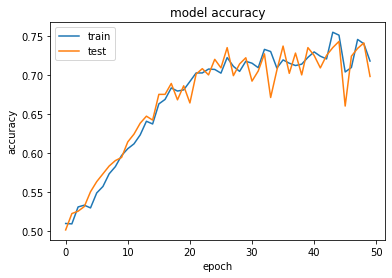

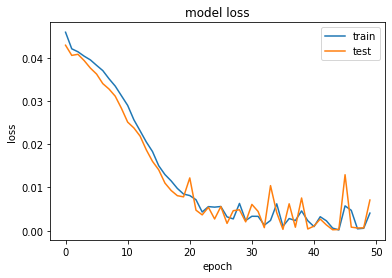

In [6]:
#do validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
mpl.rcParams['figure.dpi'] = 105

In [ ]:
#model.save('NN_model') #this is how to save the trained model to a folder
#model = keras.models.load_model('NN_model') #this is how to load the model folder as a useful object


In [16]:
#example of how to use the NN_model to predict on a given input
#probably nest the 5 lines below into a for loop to perform online predictions
reshaped_X = X_data_normalized[7,:].reshape(1,len(predictors)) #change the 0th index of X_train to see different datapoints
reshaped_X = X_data_normalized[4987,:].reshape(1,len(predictors)) #change the 0th index of X_train to see different datapoints
Y_output_normalized = model.predict(reshaped_X)[0]
Y_output_final = Undo_NormalizeData(Y_output_normalized, Y_data[4987])
print(Y_output_final)

[1935.7637 1495.1533]
